# PCA

## MNIST 
Датасет рукописных цифр. 

* Каждая цифра - черно-белая картинка 8x8 пикселей, закодированная массивом из 64 ячеек
* Каждая ячейка - цифра от 0 до 16, описывающая градацию серого цвета в этой ячейки
* Количество экземпляров: 1797
* Количество классов: 10
* Количество экземпляров на класс: ~180

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
X_digits = digits.data

In [3]:
X_digits[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

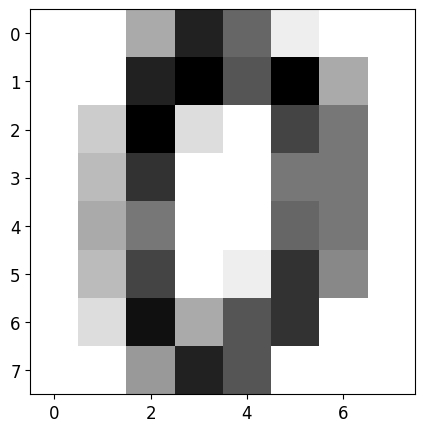

In [4]:
plt.imshow(X_digits[0].reshape(8, 8), cmap=plt.cm.binary)

## Уменьшим размерность

Text(0, 0.5, 'explained_variance_ratio_')

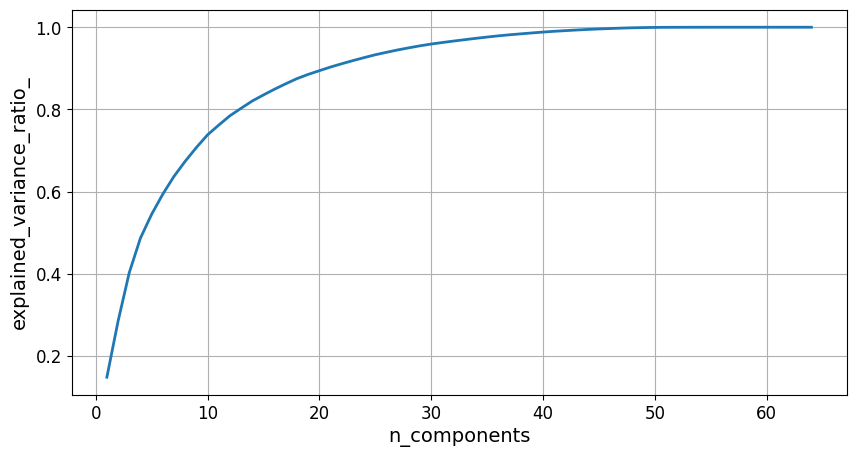

In [5]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_digits)

cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [9]:
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_ * 100

array([14.89059358, 13.61877124, 11.79459376,  8.40997942,  5.78241466,
        4.91691032,  4.31598701,  3.66137258,  3.3532481 ,  3.07880621,
        2.37234084,  2.27269657,  1.82186331,  1.77385494,  1.46710109,
        1.4097156 ,  1.3185892 ,  1.24813782,  1.01771796,  0.90561744,
        0.88953846,  0.79712316,  0.76749325,  0.72290357,  0.69588885,
        0.59608146,  0.57561469,  0.51515758,  0.48953978,  0.42888797,
        0.37360605,  0.35327422,  0.33668399,  0.32802985,  0.30832088,
        0.29377863,  0.25658861,  0.2277424 ,  0.22227792,  0.21143039,
        0.18990906,  0.15865291,  0.15115993,  0.14057876,  0.11662229,
        0.10749252,  0.09640531,  0.07746303,  0.05572116,  0.04043307,
        0.02099163,  0.00824797,  0.0052515 ,  0.00505244,  0.00329961,
        0.00124365,  0.00070483,  0.00030143,  0.00010623,  0.00005501,
        0.00003429,  0.        ,  0.        ,  0.        ])

In [10]:
pca.components_[-1]

array([ 1., -0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,
       -0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0., -0.,  0.,
       -0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
        0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,
       -0., -0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.])

Уже на 40 компонентах мы объяснили почти весь variance. Похоже на правду?

In [11]:
from sklearn.preprocessing import binarize
bin_X = binarize(X_digits).sum(axis=0)  # считаем сколько раз активизировалась каждая из 64 ячеек

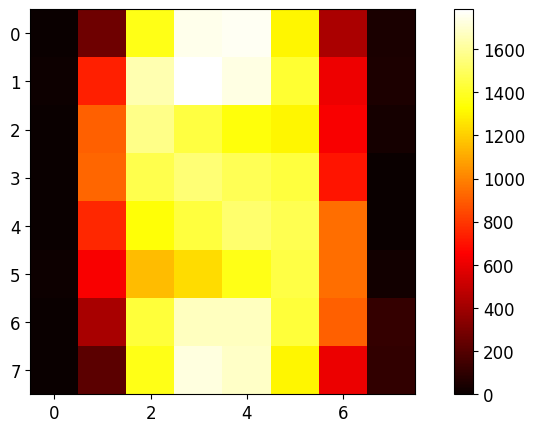

In [12]:
plt.imshow(bin_X.reshape(8, 8), cmap=plt.cm.hot)
plt.colorbar()

## Kernel PCA

In [13]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

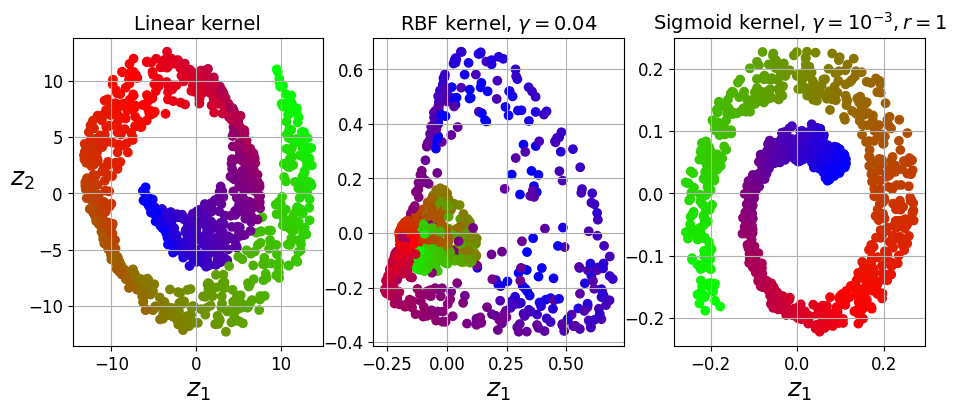

In [14]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.brg)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

## Manifold Learning

In [15]:
from sklearn.manifold import MDS, Isomap, TSNE

# уменьшает размерность, пытаясь сохранить расстояние между объектами
mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

# создает граф, соединяя объекты с их ближайшими соседями
# уменьшает размерность, пытаясь сохранить геодезическое расстояние 
# (количество узлов в кратчайшем пути между двумя исходными вершинами графа)
isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

# уменьшает размерность, пытаясь сохранить близкие в исходном пространстве объекты ближе друг к другу, 
# а далекие подальше друг от друга (часто используется для визуализации кластеров)
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

c:\Users\Kirilll\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Kirilll\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


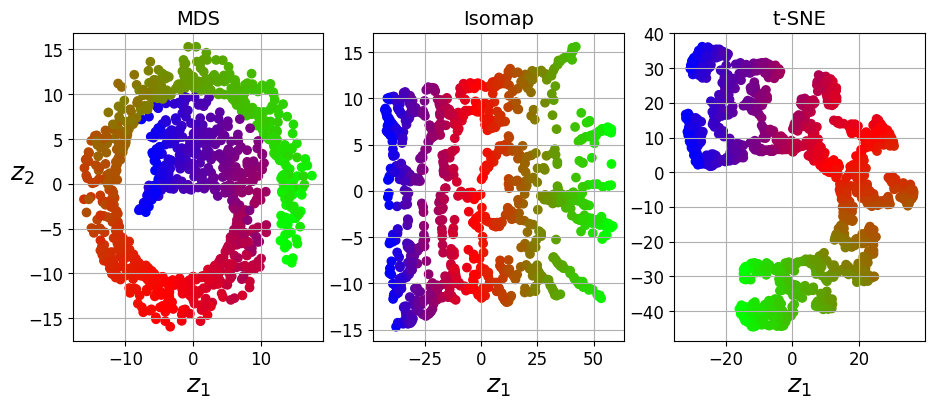

In [16]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles, (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.brg)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

А здесь можно поиграть с визуализацией: http://projector.tensorflow.org/